# Problem 3

RBF NN based on Gaussian kernel functions with constant spread function using all the points in the training set as centers of the RB functions.

Radial basis function consists of 3 layers. The first layer is the input layer and of course the output layer and the hidden layer. Here we have only one hidden layer unlike MLP. The weights between the input and hidden layer are unity.

In [1]:
## Importing the necessary libraries to perform the task

In [2]:
import numpy as np
import matplotlib.pyplot as plt

We need our input and output data. As per the problem x is a function if xi and xj. i and j can take values from 0 to 21. If we substitute the values of i and j in below equation we will get out inputs 

𝑥i = −2 + 0.2 𝑖 
𝑥j = −2 + 0.2 𝑗

The obtained value of xi and xj is substituted in provided function to get the outputs

 


In [3]:
#Declaring input data and output data list to store the values
#Training data

input_data= []
output_data = []

''' 
Considering 80% of 441 dataset to training, So 352 samples considered for training
'''

for i in range (352):
    x= np.random.randint(0,21)
    y= np.random.randint(0,21)
     
    x1 = -2 +0.2*x
    x2 = -2 + 0.2*y
    
    if ((x1 ** 2 + x2 **2) <=1):
        output_data.append(1)
    else:
        output_data.append(-1)
        
    input_data.append([x1,x2])
    
input_data=np.array(input_data)
output_data=np.array(output_data)

In [4]:
# Testing data
''' 
Considering 20% of 441 dataset to training, So 89 samples for testing
'''

test_input_data = []
test_output_data = []

for i in range (89):
    x= np.random.randint(0,21)
    y= np.random.randint(0,21)
    
    x1 = -2 +0.2*x
    x2 = -2 + 0.2*y
    
    if ((x1 ** 2 + x2 **2) <=1):
        test_output_data.append(1)
    else:
        test_output_data.append(-1)
        
    test_input_data.append([x1,x2])
    
test_input_data=np.array(test_input_data)
test_output_data=np.array(test_output_data)
 

Once we obtained the training and test input/output data, we can proceed with the Gaussian RBF function. 

Every neuron in the hidden layer computes radial basis functional value for the input vector. The Gaussian Radial basis function has 2 value the receptor (t) (which is also called the centre) and sigma (σ) which is the spread of the function. 
To execute Gaussian RBF function, 2 learnings must be done. Out of which the first one is

1.To find the value for t and σ. 

From the probelem, training set is the center and sigma is constant for all the kernel. we will have to compare the results by varying the sigma. so we select a range of sigma from 0 to 10.

So we can directly work on the Gaussian function as we have the 't' and 'σ'. We just need to find the distance and we can use it in the Gaussian equation 




In [5]:
def distance(inputs,receptors):
    dist= np.linalg.norm(inputs - receptors)**2
    return dist

In [6]:

## The gaussian matrix will be of N*M dimension where N is input sample number and  M is the number of receptor


def gaussian(inputs,receptors,sigma):
    
    G=np.zeros((inputs.shape[0],receptors.shape[0]))
    sig = 2*(sigma **2)
    
    for index_t, t in enumerate(receptors):
        for index_inp, inp in enumerate(inputs):
            d = distance(inp,t)
            g=np.exp(-d/sig)
            
            G[index_inp,index_t]=g
            
    return G



once G is found, we can now work on the second level of learning in RBF functions. Finding the value of the Weights in the output layer. (Because the linear combination of the output of the RBF function is likely to give the class belongingness i.e., the class of the feature vectors. It is decided by the weights in the output layer)

In [7]:
'''In the case where the RBFN is used for interpolation
purposes, we can use the inverse or pseudo-inverse method
to calculate the weight matrix.'''

def weight_calc(inputs,receptors,sigma,V):
    
    G_matrix=gaussian(inputs,receptors,sigma)
    G=np.linalg.pinv(G_matrix)
    w=np.dot(G,V)
       
    return w

In [8]:
 ''' Finding the output by multiplying G.W. This is required to find the Mean 
 square error and the accuracy and will also help witht he plots'''

def output_calc(test_input_list,receptors,sigma,w):
    
    gauss_mat_test= gaussian(test_input_list,receptors,sigma)
    output= np.dot(gauss_mat_test,w)
    
    return output

In [9]:
def mean_square_err_calc(y_true,y_pred):
    return np.mean((y_true - y_pred) ** 2)

In [10]:
def accuracy_calc(y_true, y_pred):
    return np.mean(y_true == y_pred)

Once all the variables of the lerning is found we can train the model with the input data and find the MSE and Accuracy. Then we can test it with the test data. As mentioned in the problem varied range of sigma is passed to understand the effect of sigma on performance of RBF

In [11]:
# Considering Sigma values from 0.1 to 25
sigma=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,20,25]
#Initialising MSE and accuracy to store the value
Mean_sq_error=[]
accuracy_list=[]
for i in sigma: 
    w= weight_calc(input_data,input_data,i,output_data)
    y_value= output_calc(test_input_data,input_data,i,w)
    y_pred= np.sign(y_value)
    error= mean_square_err_calc(test_output_data,y_pred)
    Mean_sq_error.append(error)
    accuracy = accuracy_calc(test_output_data,y_pred)
    accuracy_list.append(accuracy)
    print("Sigma : {} | MSE : {} | Accuracy : {}% ".format(i,error,accuracy*100))

Sigma : 0.1 | MSE : 0.0449438202247191 | Accuracy : 98.87640449438202% 
Sigma : 0.2 | MSE : 0.0449438202247191 | Accuracy : 98.87640449438202% 
Sigma : 0.3 | MSE : 0.1797752808988764 | Accuracy : 95.50561797752809% 
Sigma : 0.4 | MSE : 0.449438202247191 | Accuracy : 88.76404494382022% 
Sigma : 0.5 | MSE : 0.7191011235955056 | Accuracy : 82.02247191011236% 
Sigma : 0.6 | MSE : 0.7191011235955056 | Accuracy : 82.02247191011236% 
Sigma : 0.7 | MSE : 0.898876404494382 | Accuracy : 77.52808988764045% 
Sigma : 0.8 | MSE : 0.5842696629213483 | Accuracy : 85.39325842696628% 
Sigma : 0.9 | MSE : 0.3595505617977528 | Accuracy : 91.01123595505618% 
Sigma : 1 | MSE : 0.0898876404494382 | Accuracy : 97.75280898876404% 
Sigma : 2 | MSE : 0.1348314606741573 | Accuracy : 96.62921348314607% 
Sigma : 3 | MSE : 0.1348314606741573 | Accuracy : 96.62921348314607% 
Sigma : 4 | MSE : 0.0449438202247191 | Accuracy : 98.87640449438202% 
Sigma : 5 | MSE : 0.0449438202247191 | Accuracy : 98.87640449438202% 
Sigm

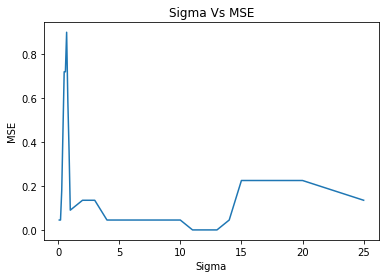

In [12]:
# Plotting the effect of sigma with MSE
plt.plot(sigma,Mean_sq_error)
plt.title("Sigma Vs MSE")
plt.xlabel("Sigma")
plt.ylabel("MSE")
plt.show()

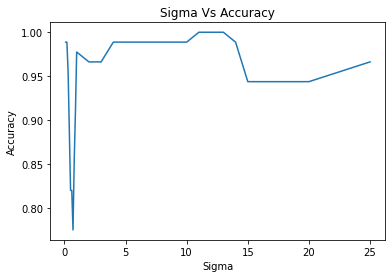

In [13]:
# Plotting the effect of sigma with Accuracy
plt.plot(sigma,accuracy_list)
plt.title("Sigma Vs Accuracy")
plt.xlabel("Sigma")
plt.ylabel("Accuracy")
plt.show()

From the implementation and the graph we can infer that for lower values of sigma (0.1 - 1.0) the accuracy was not consistent. It was fluctuating and the system doesnot perform effectively. A smaller spread doesn’t seem to provide for a good
interpolation of the function in between sample data.

when we increased the spread (2.0 - 4.0) it provides good accuracy consistently. We obtained an accuracy of ~99% when sigma value is 2,3,4. This particular spread (sigma = 3) value seems to provide the network with
the adequate interpolation property.

However, when we increase the spread, the network saturates. A larger width value 14 seems to be inadequate for this
case, given that a lot of information is being lost when the ranges of the radial functions are further away from
the original range of the function.

So for sigma = 3, we achieved an accuracy of ~99% as per the above implementation. 

## Part 2
a) Choosing 150 random points as Centres

In [14]:
random_points = np.random.choice(input_data.shape[0], size=150, replace=False)
random_150_centers = input_data[random_points,:]

In [15]:
# Considering Sigma values from 0.1 to 25
sigma=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,20,25]
#Initialising MSE and accuracy to store the value
Mean_sq_error_150=[]
accuracy_150=[]
for i in sigma: 
    w= weight_calc(input_data,random_150_centers,i,output_data)
    y_value_150= output_calc(test_input_data,random_150_centers,i,w)
    y_pred_150= np.sign(y_value_150)
    error= mean_square_err_calc(test_output_data,y_pred_150)
    Mean_sq_error_150.append(error)
    accuracy = accuracy_calc(test_output_data,y_pred_150)
    accuracy_150.append(accuracy)
    print("Sigma : {} | MSE : {} | Accuracy of the network with 150 randomly selected centers : {}% ".format(i,error,accuracy*100))

Sigma : 0.1 | MSE : 0.1348314606741573 | Accuracy of the network with 150 randomly selected centers : 96.62921348314607% 
Sigma : 0.2 | MSE : 0.0898876404494382 | Accuracy of the network with 150 randomly selected centers : 97.75280898876404% 
Sigma : 0.3 | MSE : 0.0449438202247191 | Accuracy of the network with 150 randomly selected centers : 98.87640449438202% 
Sigma : 0.4 | MSE : 0.0449438202247191 | Accuracy of the network with 150 randomly selected centers : 98.87640449438202% 
Sigma : 0.5 | MSE : 0.0449438202247191 | Accuracy of the network with 150 randomly selected centers : 98.87640449438202% 
Sigma : 0.6 | MSE : 0.0898876404494382 | Accuracy of the network with 150 randomly selected centers : 97.75280898876404% 
Sigma : 0.7 | MSE : 0.0898876404494382 | Accuracy of the network with 150 randomly selected centers : 97.75280898876404% 
Sigma : 0.8 | MSE : 0.0898876404494382 | Accuracy of the network with 150 randomly selected centers : 97.75280898876404% 
Sigma : 0.9 | MSE : 0.08

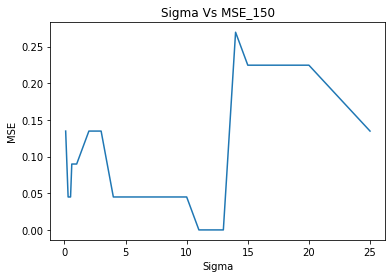

In [16]:
# Plotting the effect of sigma with MSE
plt.plot(sigma,Mean_sq_error_150)
plt.title("Sigma Vs MSE_150")
plt.xlabel("Sigma")
plt.ylabel("MSE")
plt.show()

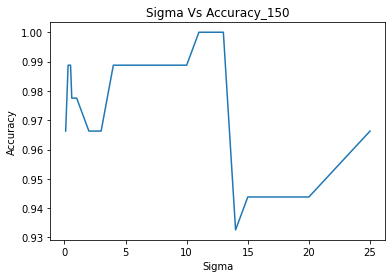

In [17]:
# Plotting the effect of sigma with Accuracy of the network with 150 centers selected randomly
plt.plot(sigma,accuracy_150)
plt.title("Sigma Vs Accuracy_150")
plt.xlabel("Sigma")
plt.ylabel("Accuracy")
plt.show()

b) Using K-Means Clustering to get 150 centres.

Design Summary
Here we compute 150 centres using kmeans clustering as the number of hidden layer neurons. 
Sigma values are ranging from 0.01 to 10 above that the values get saturated .

In [18]:
#Importing the necessary libraries

from sklearn.cluster import KMeans

In [19]:
kmeans = KMeans(n_clusters=150, random_state=0).fit(input_data)


In [20]:
kmeans_centers = kmeans.cluster_centers_


In [21]:
# Considering Sigma values from 0.1 to 25
sigma=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,20,25]
#Initialising MSE and accuracy to store the value
Mean_sq_error_kmeans=[]
accuracy_kmeans=[]
for i in sigma: 
    w= weight_calc(input_data,kmeans_centers,i,output_data)
    y_value_kmeans= output_calc(test_input_data,kmeans_centers,i,w)
    y_pred_kmeans= np.sign(y_value_kmeans)
    error= mean_square_err_calc(test_output_data,y_pred_kmeans)
    Mean_sq_error_kmeans.append(error)
    accuracy = accuracy_calc(test_output_data,y_pred_kmeans)
    accuracy_kmeans.append(accuracy)
    print("Sigma : {} | MSE : {} | Accuracy of the network with 150 centers selected by Kmeans : {}% ".format(i,error,accuracy*100))

Sigma : 0.1 | MSE : 0.1797752808988764 | Accuracy of the network with 150 centers selected by Kmeans : 95.50561797752809% 
Sigma : 0.2 | MSE : 0.0449438202247191 | Accuracy of the network with 150 centers selected by Kmeans : 98.87640449438202% 
Sigma : 0.3 | MSE : 0.0449438202247191 | Accuracy of the network with 150 centers selected by Kmeans : 98.87640449438202% 
Sigma : 0.4 | MSE : 0.0449438202247191 | Accuracy of the network with 150 centers selected by Kmeans : 98.87640449438202% 
Sigma : 0.5 | MSE : 0.0449438202247191 | Accuracy of the network with 150 centers selected by Kmeans : 98.87640449438202% 
Sigma : 0.6 | MSE : 0.1348314606741573 | Accuracy of the network with 150 centers selected by Kmeans : 96.62921348314607% 
Sigma : 0.7 | MSE : 0.1348314606741573 | Accuracy of the network with 150 centers selected by Kmeans : 96.62921348314607% 
Sigma : 0.8 | MSE : 0.1348314606741573 | Accuracy of the network with 150 centers selected by Kmeans : 96.62921348314607% 
Sigma : 0.9 | MS

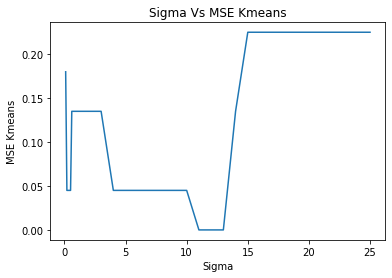

In [22]:
# Plotting the effect of sigma with MSE
plt.plot(sigma,Mean_sq_error_kmeans)
plt.title("Sigma Vs MSE Kmeans")
plt.xlabel("Sigma")
plt.ylabel("MSE Kmeans")
plt.show()

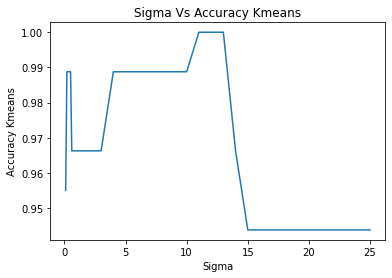

In [23]:
# Plotting the effect of sigma with Accuracy of the network with 150 centers selected using Kmeans algorithm
plt.plot(sigma,accuracy_kmeans)
plt.title("Sigma Vs Accuracy Kmeans")
plt.xlabel("Sigma")
plt.ylabel("Accuracy Kmeans")
plt.show()

#### Comparing the Design

Plotting the graph of sigma vs MSE of all the 3 design to get much deeper perspective

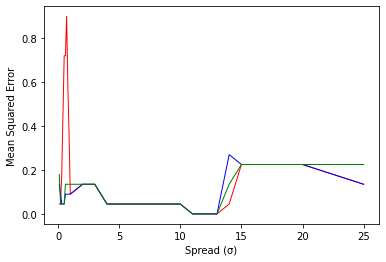

In [24]:
plt.subplot(1,1,1)
plt.plot(sigma , Mean_sq_error, color='red', linewidth=1)
plt.plot(sigma , Mean_sq_error_150, color='blue', linewidth=1)
plt.plot(sigma , Mean_sq_error_kmeans, color='green', linewidth=1)
plt.xlabel("Spread (σ)")
plt.ylabel("Mean Squared Error")
plt.show()


Plotting the graph of sigma vs Accuracy of all the 3 design to get much deeper perspective

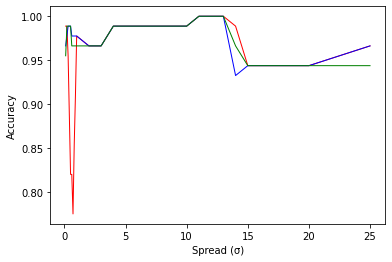

In [25]:
plt.subplot(1,1,1)
plt.plot(sigma , accuracy_list, color='red', linewidth=1)
plt.plot(sigma , accuracy_150, color='blue', linewidth=1)
plt.plot(sigma , accuracy_kmeans, color='green', linewidth=1)
plt.xlabel("Spread (σ)")
plt.ylabel("Accuracy")
plt.show()


## From the above implementaions and graphs, we observe the below,

For all the 3 designs, the maximum accuracy obtained is at sigma=11, which indicates that the spread parameter is independent on the number of centres to be choosen. In my observation I got Maximum accuracy of 100% for the case where sigma = 3 on all the 3 designs. 

In general as the number of centres reduces the accuracy reduces for a constant sigma.So lesser the number of hidden neurons lesser the accuracy and Kmeans clustering design works better than the random center selection design with same number of centers



References:

1. https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
2. ECE 657 - Spring 2022 - Lectures - Set 3
3. Mod-01 Lec-27 RBF Neural Networks - nptelhrd